In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
import os

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Raleigh Irradiance data and realtime data

In [3]:
irradiance_data = pd.read_csv('Raleigh/6ef6c64fbb3bfd36bcb328cc956df78d/Modified_1097600_35.81_-78.62_2006.csv')
irradiance_data['LocalTime'] = pd.to_datetime(irradiance_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
irradiance_data["TIME"] = pd.to_datetime(irradiance_data["LocalTime"]).dt.time
irradiance_data["DATE"] = pd.to_datetime(irradiance_data["LocalTime"]).dt.date
irradiance_data = irradiance_data[irradiance_data['Minute'] == 0]
irradiance_data.describe().style.background_gradient(cmap='cool')

,Year,Month,Day,Hour,Minute,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,Relative Humidity,Temperature,Pressure,Clearsky DHI,Clearsky DNI,Clearsky GHI,GHI,Solar Zenith Angle,Cloud Type,Fill Flag,Wind Direction,Precipitable Water,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2006.000000,6.526027,15.720548,11.500000,0.000000,70.386301,212.206621,10.680137,0.135901,0.376358,79.855897,15.192352,1002.162100,60.755594,308.211872,241.425228,194.150457,89.704131,2.592466,0.218265,207.602888,2.403393,11.019546,8.635740
std,0.000000,3.448048,8.796749,6.922582,0.000000,102.591189,316.908887,8.290739,0.011657,0.248469,20.103772,9.167436,7.079941,79.635978,353.953397,313.792092,278.828920,38.207818,2.946745,0.838390,101.589959,1.419708,16.657769,13.088658
min,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-13.000000,0.116000,0.000000,26.820000,-6.000000,980.000000,0.000000,0.000000,0.000000,0.000000,12.840000,0.000000,0.000000,0.100000,0.182000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,5.750000,0.000000,0.000000,0.000000,4.000000,0.125000,0.200000,64.747500,8.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,58.940000,0.000000,0.000000,140.000000,1.185000,0.000000,0.000000
50%,2006.000000,7.000000,16.000000,11.500000,0.000000,0.000000,0.000000,11.000000,0.133000,0.300000,85.985000,16.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,90.135000,1.000000,0.000000,223.100000,2.184000,0.000000,0.000000
75%,2006.000000,10.000000,23.000000,17.250000,0.000000,111.000000,431.250000,18.000000,0.148000,0.500000,99.060000,22.000000,1010.000000,106.000000,674.000000,498.250000,353.000000,120.650000,6.000000,0.000000,293.000000,3.427000,19.448450,15.223200
max,2006.000000,12.000000,31.000000,23.000000,0.000000,491.000000,1006.000000,26.000000,0.153000,1.800000,100.000000,37.000000,1020.000000,458.000000,1006.000000,1043.000000,1043.000000,167.350000,9.000000,4.000000,360.000000,6.234000,64.221000,50.579500


In [4]:
actual_solar = pd.read_csv('Raleigh/6ef6c64fbb3bfd36bcb328cc956df78d/Actual_35.85_-78.65_2006_DPV_37MW_5_Min.csv')
da_solar = pd.read_csv('Raleigh/6ef6c64fbb3bfd36bcb328cc956df78d/DA_35.85_-78.65_2006_DPV_37MW_60_Min.csv')
ha4_solar = pd.read_csv('Raleigh/6ef6c64fbb3bfd36bcb328cc956df78d/HA4_35.85_-78.65_2006_DPV_37MW_60_Min.csv')

In [5]:
# actual
actual_solar['LocalTime'] = pd.to_datetime(actual_solar['LocalTime'])
# adding separate time and date columns
actual_solar["Year"] = pd.to_datetime(actual_solar["LocalTime"]).dt.year
actual_solar['Day'] = pd.to_datetime(actual_solar['LocalTime']).dt.day
actual_solar['Month'] = pd.to_datetime(actual_solar['LocalTime']).dt.month
actual_solar["TIME"] = pd.to_datetime(actual_solar["LocalTime"]).dt.time
actual_solar["DATE"] = pd.to_datetime(actual_solar["LocalTime"]).dt.date
# add hours and minutes for ml models
actual_solar['Hour'] = pd.to_datetime(actual_solar['TIME'],format='%H:%M:%S').dt.hour
actual_solar['Minute'] = pd.to_datetime(actual_solar['TIME'],format='%H:%M:%S').dt.minute
actual_solar['TOTAL MINUTES PASS'] = actual_solar['Minute'] + actual_solar['Hour']*60
# remove other times, keep only 00 minutes
actual_solar = actual_solar[actual_solar['Minute'] == 0]

# day ahead
da_solar['LocalTime'] = pd.to_datetime(da_solar['LocalTime'])
# adding separate time and date columns
da_solar["Year"] = pd.to_datetime(da_solar["LocalTime"]).dt.year
da_solar['Day'] = pd.to_datetime(da_solar['LocalTime']).dt.day
da_solar['Month'] = pd.to_datetime(da_solar['LocalTime']).dt.month
da_solar["TIME"] = pd.to_datetime(da_solar["LocalTime"]).dt.time
da_solar["DATE"] = pd.to_datetime(da_solar["LocalTime"]).dt.date
# add hours and minutes for ml models
da_solar['Hour'] = pd.to_datetime(da_solar['TIME'],format='%H:%M:%S').dt.hour
da_solar['Minute'] = pd.to_datetime(da_solar['TIME'],format='%H:%M:%S').dt.minute
da_solar['TOTAL MINUTES PASS'] = da_solar['Minute'] + da_solar['Hour']*60

# 4 hour ahead
ha4_solar['LocalTime'] = pd.to_datetime(ha4_solar['LocalTime'])
# adding separate time and date columns
ha4_solar["Year"] = pd.to_datetime(ha4_solar["LocalTime"]).dt.year
ha4_solar['Day'] = pd.to_datetime(ha4_solar['LocalTime']).dt.day
ha4_solar['Month'] = pd.to_datetime(ha4_solar['LocalTime']).dt.month
ha4_solar["TIME"] = pd.to_datetime(ha4_solar["LocalTime"]).dt.time
ha4_solar["DATE"] = pd.to_datetime(ha4_solar["LocalTime"]).dt.date
# add hours and minutes for ml models
ha4_solar['Hour'] = pd.to_datetime(ha4_solar['TIME'],format='%H:%M:%S').dt.hour
ha4_solar['Minute'] = pd.to_datetime(ha4_solar['TIME'],format='%H:%M:%S').dt.minute
ha4_solar['TOTAL MINUTES PASS'] = ha4_solar['Minute'] + ha4_solar['Hour']*60
actual_solar

,LocalTime,Power(MW),Year,Day,Month,TIME,DATE,Hour,Minute,TOTAL MINUTES PASS
0,2006-01-01 00:00:00,0.0,2006,1,1,00:00:00,2006-01-01,0,0,0
12,2006-01-01 01:00:00,0.0,2006,1,1,01:00:00,2006-01-01,1,0,60
24,2006-01-01 02:00:00,0.0,2006,1,1,02:00:00,2006-01-01,2,0,120
36,2006-01-01 03:00:00,0.0,2006,1,1,03:00:00,2006-01-01,3,0,180
48,2006-01-01 04:00:00,0.0,2006,1,1,04:00:00,2006-01-01,4,0,240
...,...,...,...,...,...,...,...,...,...,...
105060,2006-12-31 19:00:00,0.0,2006,31,12,19:00:00,2006-12-31,19,0,1140
105072,2006-12-31 20:00:00,0.0,2006,31,12,20:00:00,2006-12-31,20,0,1200
105084,2006-12-31 21:00:00,0.0,2006,31,12,21:00:00,2006-12-31,21,0,1260
105096,2006-12-31 22:00:00,0.0,2006,31,12,22:00:00,2006-12-31,22,0,1320


In [6]:
print(actual_solar.info())
print(actual_solar.isnull().sum())
actual_solar.describe().style.background_gradient(cmap='cool')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 105108
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   LocalTime           8760 non-null   datetime64[ns]
 1   Power(MW)           8760 non-null   float64       
 2   Year                8760 non-null   int64         
 3   Day                 8760 non-null   int64         
 4   Month               8760 non-null   int64         
 5   TIME                8760 non-null   object        
 6   DATE                8760 non-null   object        
 7   Hour                8760 non-null   int64         
 8   Minute              8760 non-null   int64         
 9   TOTAL MINUTES PASS  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 752.8+ KB
None
LocalTime             0
Power(MW)             0
Year                  0
Day                   0
Month                 0
TIME       

,Power(MW),Year,Day,Month,Hour,Minute,TOTAL MINUTES PASS
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,5.669475,2006.000000,15.720548,6.526027,11.500000,0.000000,690.000000
std,8.428114,0.000000,8.796749,3.448048,6.922582,0.000000,415.354901
min,0.000000,2006.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2006.000000,8.000000,4.000000,5.750000,0.000000,345.000000
50%,0.000000,2006.000000,16.000000,7.000000,11.500000,0.000000,690.000000
75%,10.400000,2006.000000,23.000000,10.000000,17.250000,0.000000,1035.000000
max,33.000000,2006.000000,31.000000,12.000000,23.000000,0.000000,1380.000000


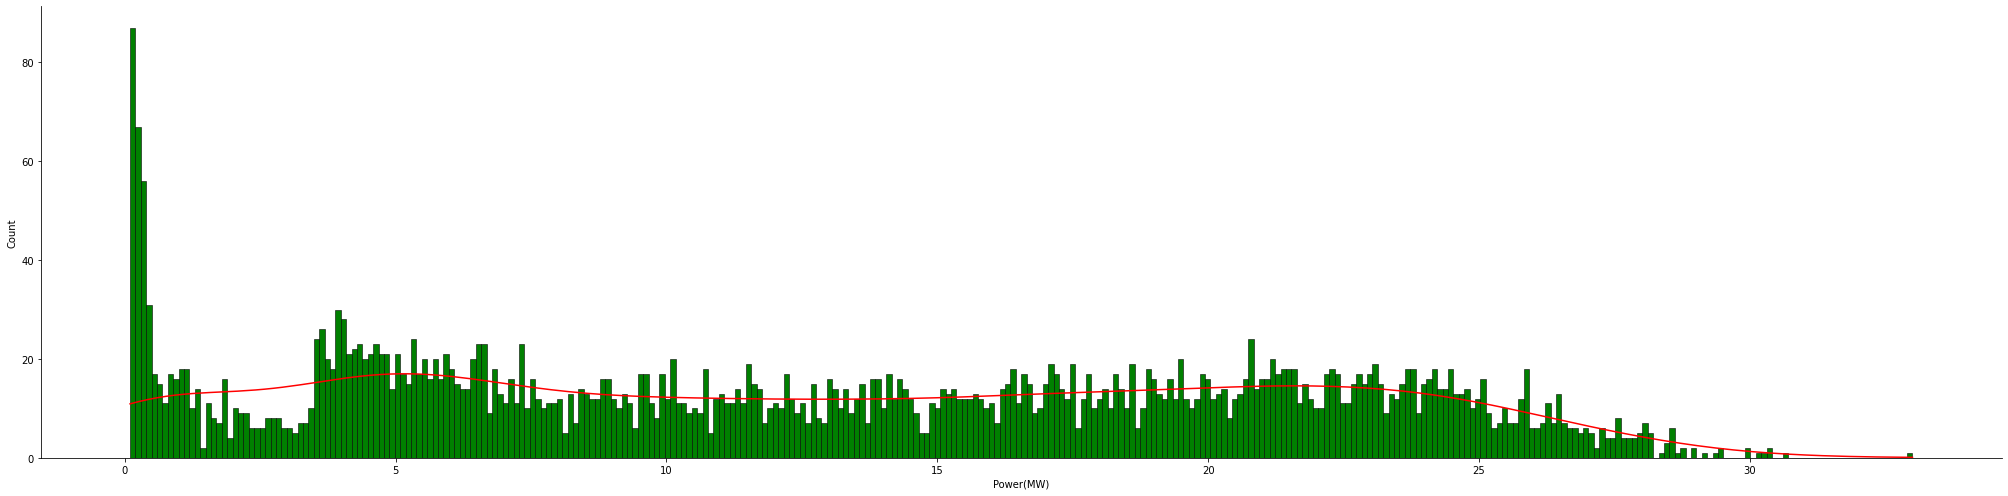

In [7]:
# ignoring times with 0 power generation
sns.displot(data=actual_solar[actual_solar['Power(MW)'] > 0], x="Power(MW)", kde=True, bins = 330,color = "red", facecolor = "green",height = 7, aspect = 4);


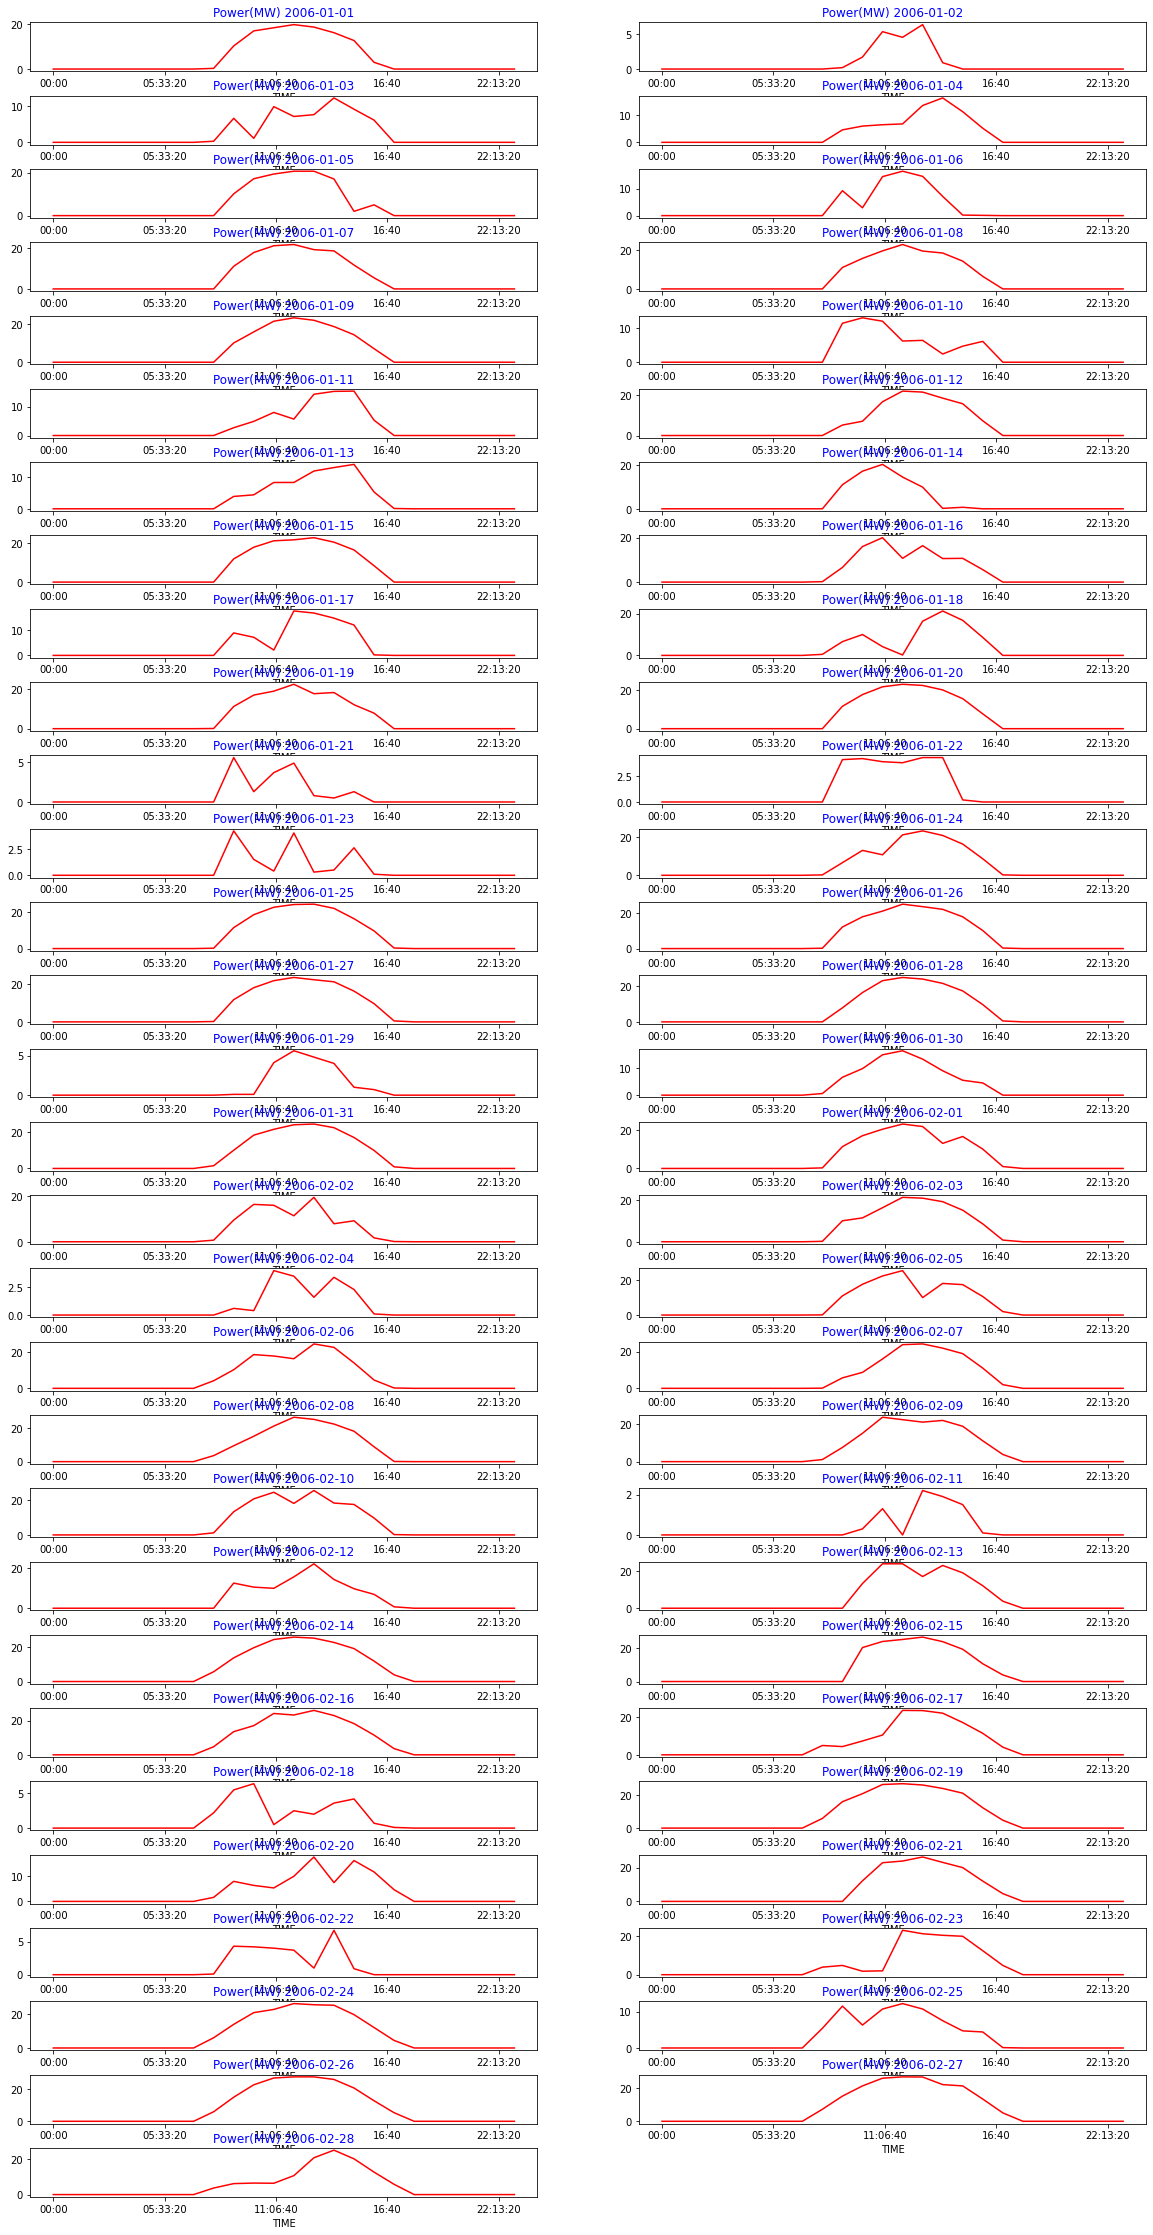

In [8]:
temp = actual_solar[actual_solar['Month'] < 3]
solar_dc = temp.pivot_table(values='Power(MW)', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='Power(MW)'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
# look at the first 2 months
Daywise_plot(data=solar_dc, row=30, col=2)

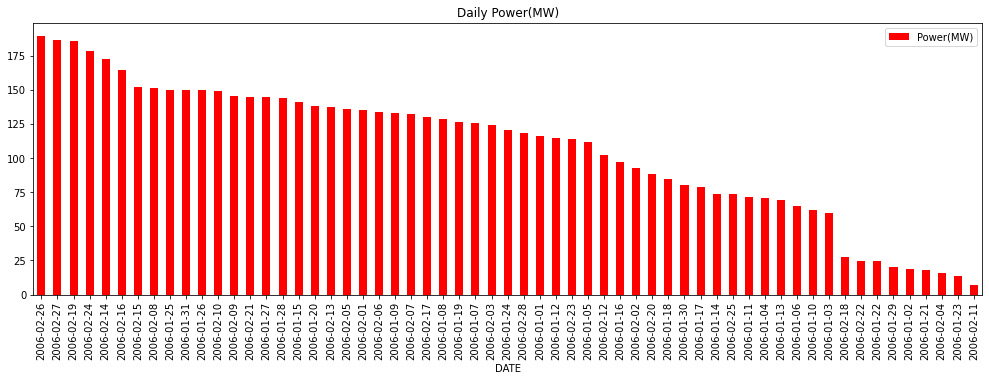

In [9]:
daily_dc = temp.groupby('DATE')['Power(MW)'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily Power(MW)')
plt.show()

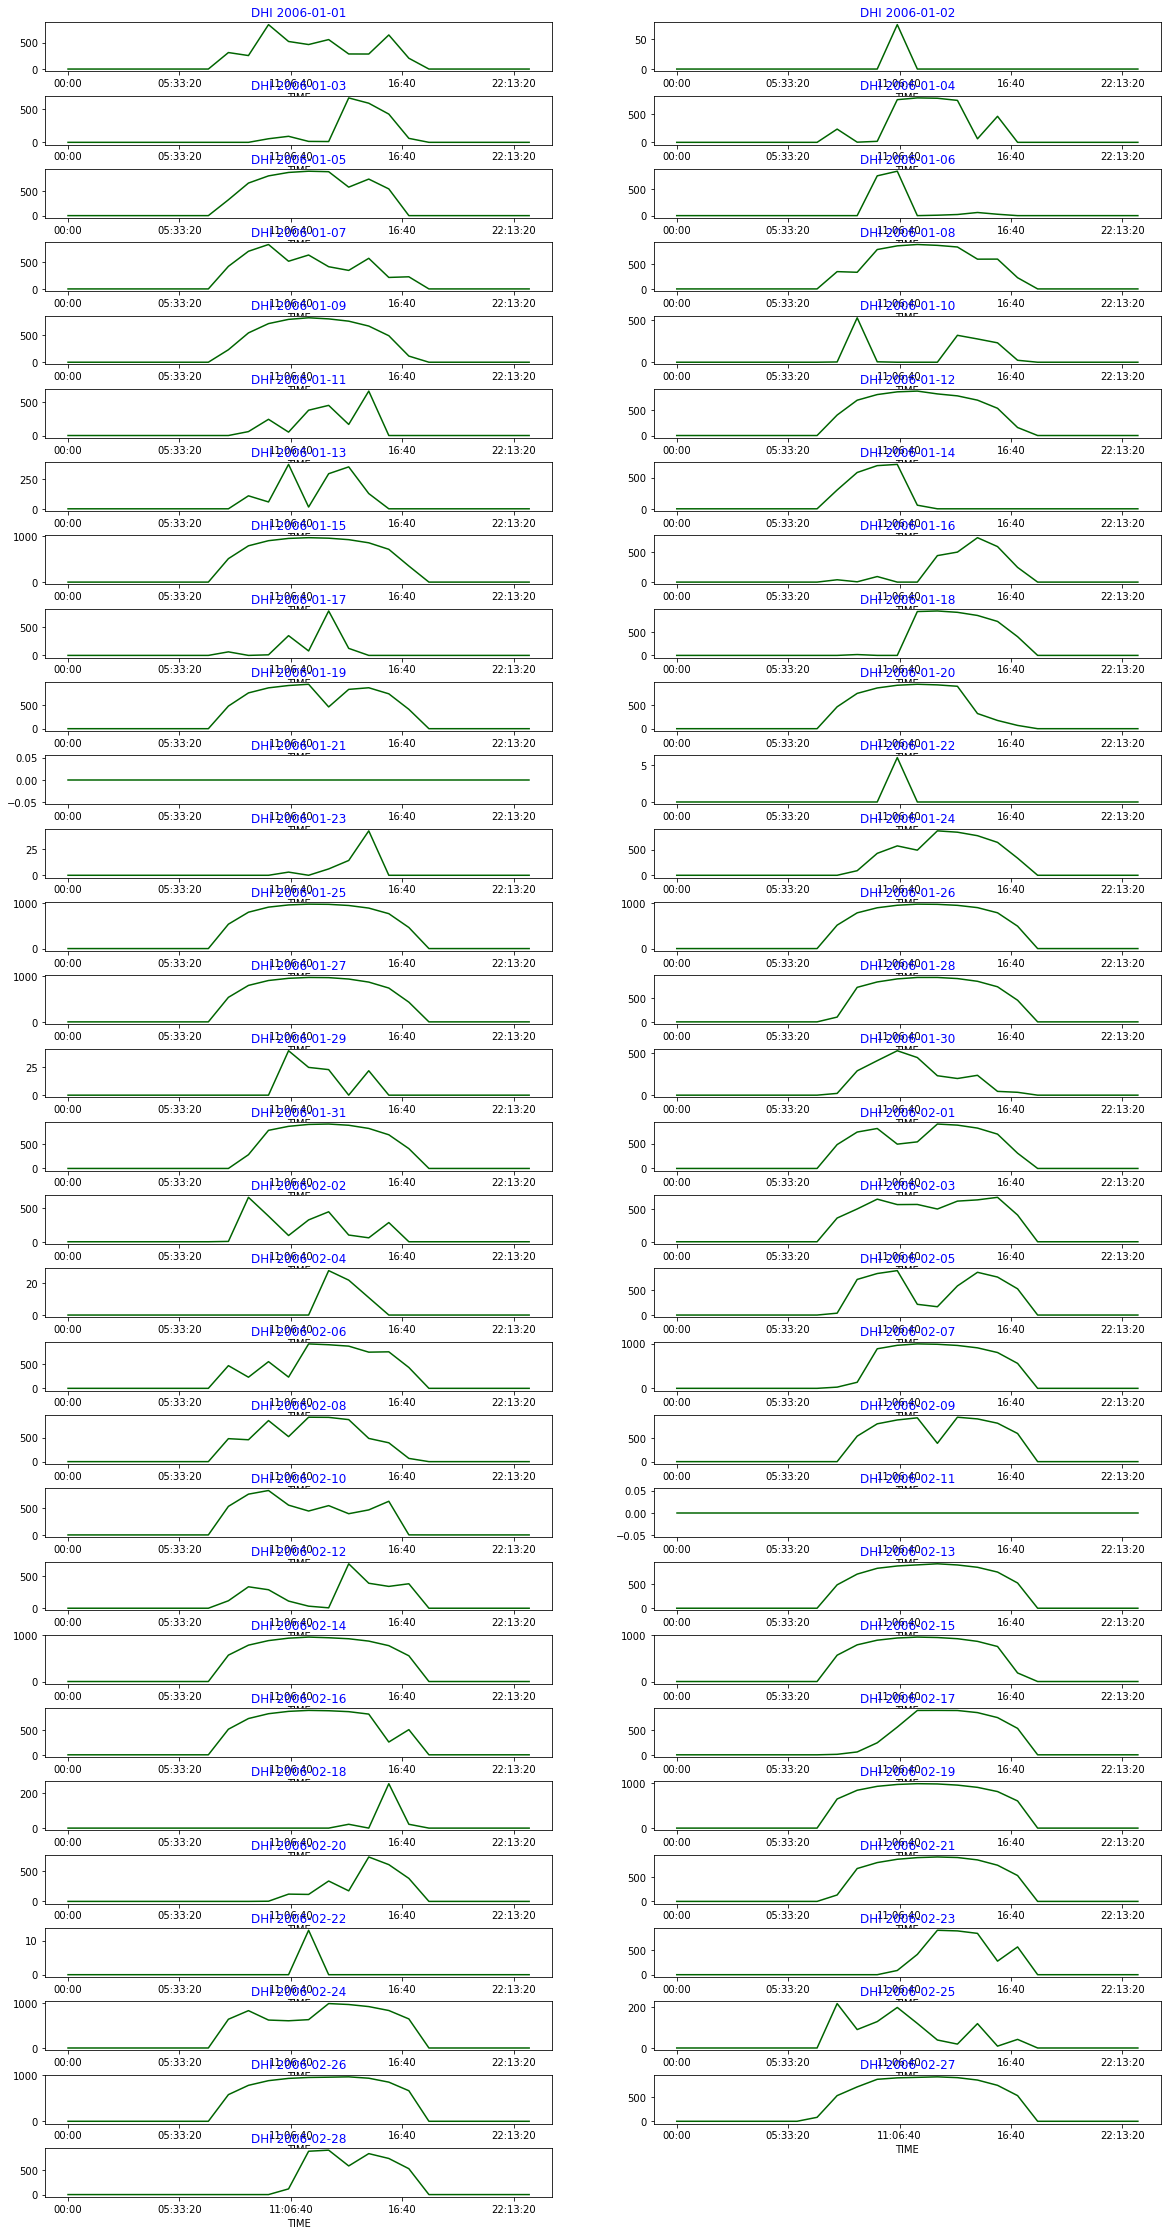

In [10]:
temp = irradiance_data[irradiance_data['Month'] < 3]
solar_dc = temp.pivot_table(values='DNI', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DHI'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=30, col=2)

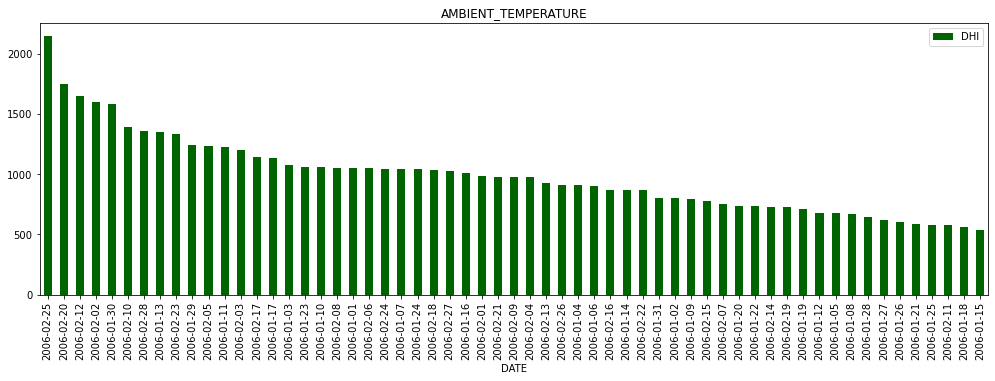

In [11]:
daily_ambient_temp = temp.groupby('DATE')['DHI'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

In [12]:
df2 = pd.merge(irradiance_data, actual_solar, how='inner', on='LocalTime')
df2 = df2[(df2['Power(MW)'] > 0) |  (df2['DHI'] > 0)|  (df2['DNI'] > 0)]

X = df2[['DHI', 'DNI', 'Dew Point',
       'Surface Albedo', 'Wind Speed', 'Relative Humidity', 'Temperature',
       'Pressure', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'GHI',
       'Solar Zenith Angle', 'Cloud Type', 'Fill Flag', 'Wind Direction',
       'Precipitable Water', 'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)']]
y = df2['Power(MW)']
df2

,Year_x,Month_x,Day_x,Hour_x,Minute_x,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,...,DATE_x,Power(MW),Year_y,Day_y,Month_y,TIME_y,DATE_y,Hour_y,Minute_y,TOTAL MINUTES PASS
8,2006,1,1,8,0,30,313,1,0.122,0.3,...,2006-01-01,0.3,2006,1,1,08:00:00,2006-01-01,8,0,480
9,2006,1,1,9,0,94,256,2,0.122,0.2,...,2006-01-01,10.3,2006,1,1,09:00:00,2006-01-01,9,0,540
10,2006,1,1,10,0,62,843,3,0.122,0.1,...,2006-01-01,17.0,2006,1,1,10:00:00,2006-01-01,10,0,600
11,2006,1,1,11,0,153,523,4,0.122,0.2,...,2006-01-01,18.4,2006,1,1,11:00:00,2006-01-01,11,0,660
12,2006,1,1,12,0,186,465,3,0.122,0.2,...,2006-01-01,19.8,2006,1,1,12:00:00,2006-01-01,12,0,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,2006,12,31,13,0,228,140,10,0.116,0.6,...,2006-12-31,5.1,2006,31,12,13:00:00,2006-12-31,13,0,780
8750,2006,12,31,14,0,190,75,11,0.116,0.6,...,2006-12-31,7.3,2006,31,12,14:00:00,2006-12-31,14,0,840
8751,2006,12,31,15,0,139,80,12,0.116,0.5,...,2006-12-31,1.3,2006,31,12,15:00:00,2006-12-31,15,0,900
8752,2006,12,31,16,0,72,140,13,0.116,0.5,...,2006-12-31,0.4,2006,31,12,16:00:00,2006-12-31,16,0,960


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=69)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 85.8947%


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  83.26 %


In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  83.26 %


In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  83.26 %


In [18]:
prediction = rfr.predict(X_test)
print(prediction)

[2.1739e+01 1.1811e+01 6.3520e+00 6.4450e+00 1.4152e+01 7.3750e+00
 7.5880e+00 2.2798e+01 1.5000e-02 2.6392e+01 2.8500e-01 1.4711e+01
 1.1011e+01 1.8776e+01 1.4000e-02 1.7096e+01 2.0932e+01 1.5746e+01
 2.4390e+01 4.8730e+00 2.1421e+01 1.5579e+01 1.1272e+01 1.5280e+00
 7.8760e+00 0.0000e+00 1.5311e+01 2.4780e+00 1.6830e+00 4.5200e-01
 2.9310e+00 2.0440e+00 2.7329e+01 2.1232e+01 2.2391e+01 2.0581e+01
 5.8670e+00 2.2051e+01 3.5240e+00 1.7581e+01 6.5200e-01 1.3226e+01
 5.5050e+00 1.0300e-01 1.3184e+01 2.6893e+01 5.1950e+00 1.9556e+01
 1.6898e+01 2.5839e+01 2.8480e+00 5.5320e+00 1.3000e-02 2.1748e+01
 2.0085e+01 1.6516e+01 1.0527e+01 4.3500e+00 7.6000e-02 6.2550e+00
 1.6481e+01 6.7490e+00 1.6988e+01 3.6340e+00 7.5490e+00 2.5533e+01
 6.9460e+00 2.0000e-02 2.0182e+01 7.3200e-01 1.4496e+01 3.8970e+00
 3.3970e+00 3.4560e+00 2.3550e+00 6.4090e+00 1.3741e+01 5.1000e-01
 1.5616e+01 1.2140e+01 1.5100e+00 6.6670e+00 9.5080e+00 2.1973e+01
 2.1621e+01 2.6171e+01 6.8030e+00 1.3180e+00 7.3350e+00 5.1470

In [19]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
3321,20.8,21.739
133,14.5,11.811
226,13.0,6.352
2201,6.8,6.445
1617,9.2,14.152


In [20]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
3321,20.8,21.739,-0.939
133,14.5,11.811,2.689
226,13.0,6.352,6.648
2201,6.8,6.445,0.355
1617,9.2,14.152,-4.952


In [21]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
6228,23.800000,21.835000,1.965000
4906,21.200000,20.103000,1.097000
2777,0.000000,2.848000,-2.848000
949,20.900000,20.922000,-0.022000
2913,19.500000,19.685000,-0.185000
6800,2.600000,5.539000,-2.939000
1639,0.000000,0.000000,0.000000
3828,24.400000,24.540000,-0.140000
3898,5.800000,8.695000,-2.895000
5048,11.200000,9.809000,1.391000


In [22]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.030 (0.124)


In [23]:
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  85.96 %


# Raleigh Irradiance data and provided 4-hour forcast data

In [25]:
df2 = pd.merge(irradiance_data, ha4_solar, how='inner', on='LocalTime')
df2 = df2[(df2['Power(MW)'] > 0) | (df2['DHI'] > 0) | (df2['DNI'] > 0)]

X = df2[['DHI', 'DNI', 'Dew Point',
       'Surface Albedo', 'Wind Speed', 'Relative Humidity', 'Temperature',
       'Pressure', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'GHI',
       'Solar Zenith Angle', 'Cloud Type', 'Fill Flag', 'Wind Direction',
       'Precipitable Water', 'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)']]
y = df2['Power(MW)']
df2

,Year_x,Month_x,Day_x,Hour_x,Minute_x,DHI,DNI,Dew Point,Surface Albedo,Wind Speed,...,DATE_x,Power(MW),Year_y,Day_y,Month_y,TIME_y,DATE_y,Hour_y,Minute_y,TOTAL MINUTES PASS
8,2006,1,1,8,0,30,313,1,0.122,0.3,...,2006-01-01,0.0,2006,1,1,08:00:00,2006-01-01,8,0,480
9,2006,1,1,9,0,94,256,2,0.122,0.2,...,2006-01-01,0.0,2006,1,1,09:00:00,2006-01-01,9,0,540
10,2006,1,1,10,0,62,843,3,0.122,0.1,...,2006-01-01,0.0,2006,1,1,10:00:00,2006-01-01,10,0,600
11,2006,1,1,11,0,153,523,4,0.122,0.2,...,2006-01-01,0.0,2006,1,1,11:00:00,2006-01-01,11,0,660
12,2006,1,1,12,0,186,465,3,0.122,0.2,...,2006-01-01,0.0,2006,1,1,12:00:00,2006-01-01,12,0,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,2006,12,31,13,0,228,140,10,0.116,0.6,...,2006-12-31,4.5,2006,31,12,13:00:00,2006-12-31,13,0,780
8750,2006,12,31,14,0,190,75,11,0.116,0.6,...,2006-12-31,7.7,2006,31,12,14:00:00,2006-12-31,14,0,840
8751,2006,12,31,15,0,139,80,12,0.116,0.5,...,2006-12-31,5.2,2006,31,12,15:00:00,2006-12-31,15,0,900
8752,2006,12,31,16,0,72,140,13,0.116,0.5,...,2006-12-31,0.1,2006,31,12,16:00:00,2006-12-31,16,0,960


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=69)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

LR Model score = 71.2119%
R2 Score :  62.01 %


In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

score_lr = 100*rfr.score(X_test,y_test)
print(f'RMR Model score = {score_lr:4.4f}%')

y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

RMR Model score = 73.0592%
R2 Score :  62.01 %


In [29]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

score_lr = 100*dtr.score(X_test,y_test)
print(f'DTR Model score = {score_lr:4.4f}%')

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

DTR Model score = 49.6980%
R2 Score :  62.01 %


In [30]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 3.001 (0.130)


In [31]:
model.fit(X_train,y_train)

score_lr = 100*model.score(X_test,y_test)
print(f'XGBR Model score = {score_lr:4.4f}%')

y_pred_lr = model.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

XGBR Model score = 74.6606%
R2 Score :  69.57 %
